<a href="https://colab.research.google.com/github/bakhtkhan123/Deep-Learning-BWF-BakhtUllah/blob/main/Task20/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [59]:
len(train_data)

8982

In [60]:
len(test_data)

2246

In [61]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [62]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [63]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [64]:
train_labels[10]

3

## Encoding the Integer sequences into a binary matrix

In [65]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [66]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [67]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [68]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [69]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

## Setting Validation Set

In [70]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [71]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 2.6685 - accuracy: 0.4996 - val_loss: 1.7978 - val_accuracy: 0.6060
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5248 - accuracy: 0.6693 - val_loss: 1.3910 - val_accuracy: 0.6830
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.2029 - accuracy: 0.7389 - val_loss: 1.2295 - val_accuracy: 0.7200
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.9923 - accuracy: 0.7866 - val_loss: 1.0995 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8256 - accuracy: 0.8187 - val_loss: 1.0194 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6950 - accuracy: 0.8478 - val_loss: 0.9608 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5755 - accuracy: 0.8765 - val_loss: 0.9118 - val_accuracy: 0.8050
Epoch 8/20
16

## Plotting Training and Validation Loss

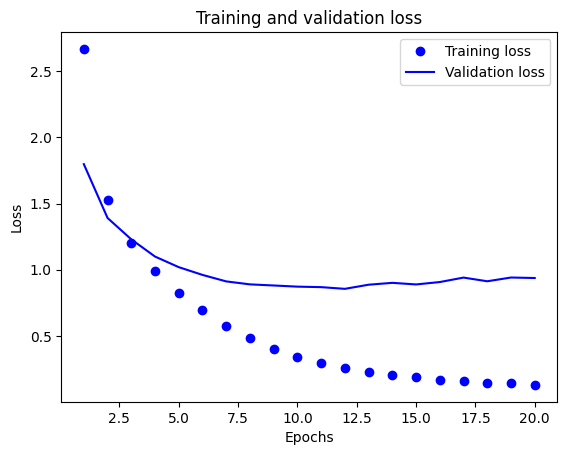

In [72]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Traing and Validation Accuracy

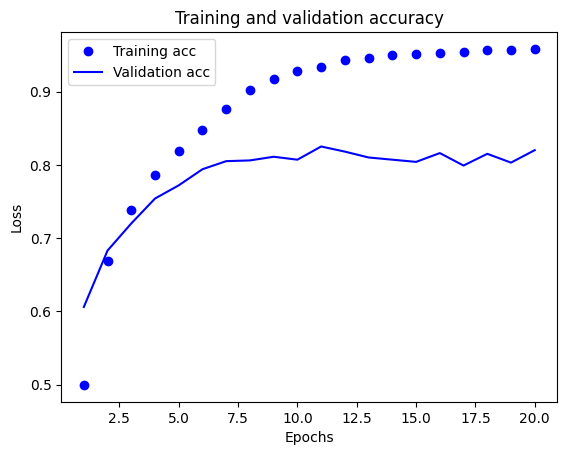

In [75]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retrain from scratch and Evaluate

In [76]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 34ms/step - loss: 2.7022 - accuracy: 0.4645 - val_loss: 1.8622 - val_accuracy: 0.6110
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.5838 - accuracy: 0.6694 - val_loss: 1.4145 - val_accuracy: 0.6930
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.2269 - accuracy: 0.7290 - val_loss: 1.2327 - val_accuracy: 0.7140
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0078 - accuracy: 0.7741 - val_loss: 1.1046 - val_accuracy: 0.7530
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8452 - accuracy: 0.8115 - val_loss: 1.0383 - val_accuracy: 0.7750
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.7045 - accuracy: 0.8467 - val_loss: 0.9671 - val_accuracy: 0.7870
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5957 - accuracy: 0.8756 - val_loss: 0.9252 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

In [77]:
results

[1.0257176160812378, 0.7787176966667175]

## Making Prediction

In [79]:
model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


array([[3.0251224e-05, 4.1247479e-04, 5.7685360e-05, ..., 7.3252377e-06,
        1.6265287e-05, 3.4725776e-06],
       [2.9808136e-03, 2.0954244e-02, 2.4122382e-02, ..., 5.7748059e-04,
        2.8048389e-06, 6.5063691e-04],
       [2.7789759e-02, 5.5455625e-01, 2.6460012e-02, ..., 3.7356099e-04,
        1.2630702e-04, 2.0583463e-03],
       ...,
       [9.8097444e-05, 6.5274327e-04, 8.0668295e-05, ..., 9.5311661e-06,
        8.2332866e-05, 2.1461618e-05],
       [4.3003480e-03, 3.8733855e-02, 8.1499442e-03, ..., 7.9724332e-04,
        5.0957163e-04, 9.9003455e-04],
       [7.7235359e-03, 1.9765341e-01, 1.5687922e-02, ..., 3.6181379e-04,
        1.6413147e-04, 3.7330785e-04]], dtype=float32)